# Rugby prediction model

Task :: Create a model to calculate the probability of the home team winning each fixture using the attached dataset.

Training set MUST be fixture date before 01/09/2018

Test set MUST be fixture date on or after 01/09/2018

 

Column's To Export to csv on completion of model (exact spelling):

Fixture Date, Fixture ID, Competition ID, Home Team ID, Away Team ID, Probability Of Home Win

Where 'Probability Of Home Win' is your calculated column.

 

The model success is measured on the number of home wins & losses correctly predicted.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from featexp import get_univariate_plots, get_trend_stats

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV, learning_curve
from sklearn import preprocessing, metrics, svm, linear_model
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,id,Fixture...Date,Competition.ID,Competition.Name,Venue.ID,Referee.ID,Home.Team...ID,Home.Team...Name,Home.Team...Actual.Score,Home.Team...Result,...,home_team_win_perc_home_30,away_team_win_perc_all_30,away_team_win_perc_comp_30,away_team_win_perc_away_30,home_team_win_perc_all_60,home_team_win_perc_comp_60,home_team_win_perc_home_60,away_team_win_perc_all_60,away_team_win_perc_comp_60,away_team_win_perc_away_60
0,5678,8/4/2007,3,International,38.0,0a0299ed-92cf-4ffd-a3ab-1d25bee9f6c3,550,England,62,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6660,9/9/2011,210,Rugby World Cup,58.0,NaN,850,New Zealand,41,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6661,9/10/2011,210,Rugby World Cup,100.0,NaN,700,Scotland,34,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6662,9/10/2011,210,Rugby World Cup,107.0,NaN,954,Fiji,49,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6663,9/10/2011,210,Rugby World Cup,102.0,NaN,650,France,47,W,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,Competition.ID,Venue.ID,Home.Team...ID,Home.Team...Actual.Score,Away.Team...ID,Away.Team...Actual.Score,Total_Match_Points,Winning_Margin,comp_home_win_perc20,...,home_team_win_perc_home_30,away_team_win_perc_all_30,away_team_win_perc_comp_30,away_team_win_perc_away_30,home_team_win_perc_all_60,home_team_win_perc_comp_60,home_team_win_perc_home_60,away_team_win_perc_all_60,away_team_win_perc_comp_60,away_team_win_perc_away_60
count,8986.000000,8986.000000,8173.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8986.000000,8945.000000,...,8489.000000,8827.000000,8670.000000,8674.000000,8830.000000,8673.000000,8674.000000,8827.000000,8670.000000,8674.000000
mean,221282.518696,212.564879,205.116481,3411.042399,27.613955,3399.224683,22.183063,49.797018,5.430892,0.616041,...,0.620518,0.485179,0.490235,0.358643,0.489879,0.501537,0.618218,0.484746,0.494786,0.358678
std,234860.645591,51.832723,176.094030,5455.566918,13.945812,5449.361742,12.302837,16.501051,20.479412,0.132693,...,0.233728,0.208807,0.234201,0.230286,0.202775,0.225839,0.231983,0.201579,0.229406,0.228569
min,1380.000000,1.000000,3.000000,9.000000,0.000000,8.000000,0.000000,0.000000,-85.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60816.250000,203.000000,64.000000,228.000000,18.000000,227.000000,14.000000,38.000000,-5.750000,0.550000,...,0.500000,0.363636,0.333333,0.200000,0.371429,0.370968,0.500000,0.366667,0.355018,0.200000
50%,97388.500000,210.000000,136.000000,1300.000000,26.000000,1300.000000,21.000000,48.000000,5.000000,0.600000,...,0.666667,0.500000,0.500000,0.357143,0.500000,0.500000,0.661017,0.500000,0.500000,0.352941
75%,319232.750000,239.000000,338.000000,3500.000000,35.000000,3500.000000,29.000000,60.000000,17.000000,0.700000,...,0.782609,0.625000,0.645161,0.500000,0.615385,0.642857,0.777778,0.611111,0.645833,0.500000
max,919053.000000,328.000000,771.000000,29799.000000,121.000000,29799.000000,97.000000,126.000000,121.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#probability of home team won is values(0,1], all negative values are home team failture, zero - draw
df['Probability Of Home Win'] = df['Winning_Margin']/df['Total_Match_Points']
df['Probability Of Home Win'].describe()

count    8984.000000
mean        0.105435
std         0.386027
min        -1.000000
25%        -0.127273
50%         0.101286
75%         0.360000
max         1.000000
Name: Probability Of Home Win, dtype: float64

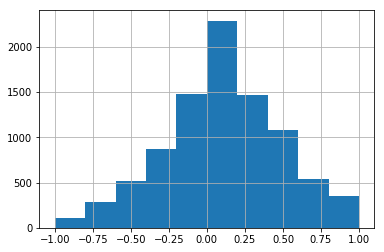

In [6]:
df['Probability Of Home Win'].hist()

I consider 'draw' as a loss, because we are interested in to be more accurate to predict if home team wins.  
Hence, I label all positive probabilities as 1 (win) and the rest as 0 (loss).

In [7]:
df['Prediction'] = df['Probability Of Home Win'].apply(lambda x: (x>0 and 1) or 0)

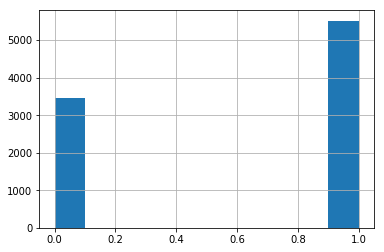

In [8]:
df['Prediction'].hist()

Dataset is unbalanced. Should balance for a better model.

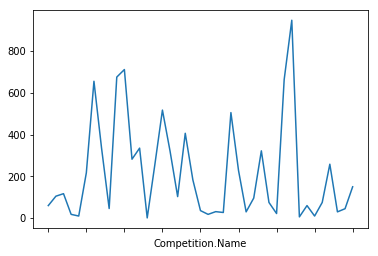

In [9]:
df.groupby('Competition.Name')['Competition.Name'].size().plot()

# Split train/test datasets

In [10]:
df.shape

(8986, 201)

In [11]:
df['Fixture...Date'].describe()

count          8986
unique          976
top       9/15/2018
freq             49
Name: Fixture...Date, dtype: object

In [12]:
df['Fixture...Date'] = pd.to_datetime(df['Fixture...Date'], format='%m/%d/%Y')

In [13]:
cols_out = ['id', 'Fixture...Date', 'Competition.ID', 'Competition.Name',
       'Venue.ID', 'Referee.ID', 'Home.Team...ID', 'Home.Team...Name',
       'Home.Team...Actual.Score', 'Home.Team...Result', 'Away.Team...ID',
       'Away.Team...Name', 'Away.Team...Actual.Score', 'Away.Team...Result',
       'Total_Match_Points', 'Winning_Margin']

In [14]:
#Training set MUST be fixture date before 01/09/2018
#Test set MUST be fixture date on or after 01/09/2018

Xtrain, Xtest, ytrain, ytest = df[df['Fixture...Date']<'01/09/2018'].drop(cols_out, axis = 1), df[df['Fixture...Date']>='01/09/2018'].drop(cols_out, axis = 1), df[df['Fixture...Date']<'01/09/2018']['Probability Of Home Win'], df[df['Fixture...Date']>='01/09/2018']['Probability Of Home Win']

In [15]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((5621, 185), (3365, 185), (5621,), (3365,))

In [16]:
prediction_column = 'Probability Of Home Win'

# Feature selection


Select features which show strong correlation trend (> 90%).

                                    Plots for comp_home_win_perc20                                    
                                           Train data plots                                           


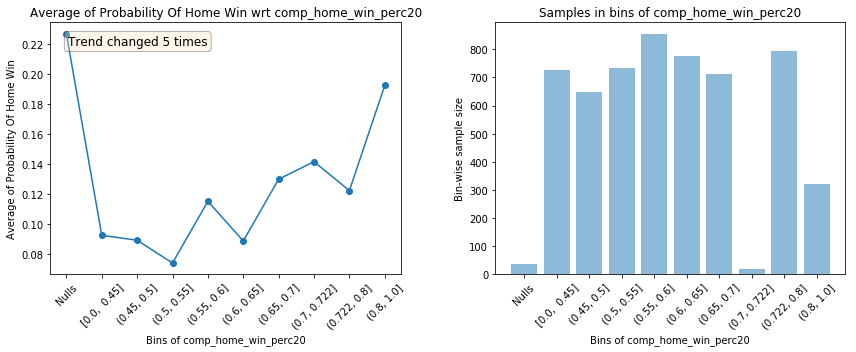

                                           Test data plots                                            


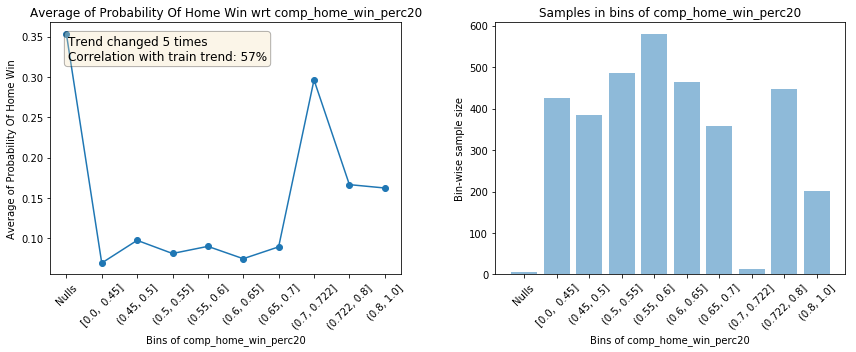

--------------------------------------------------------------------------------------------------------------


                                    Plots for comp_home_win_perc40                                    
                                           Train data plots                                           


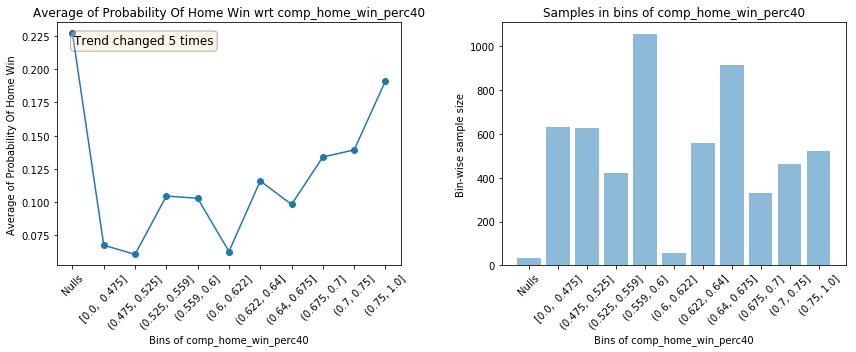

                                           Test data plots                                            


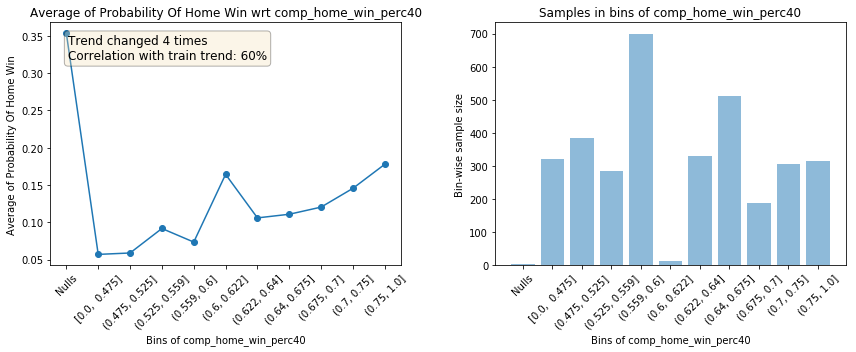

--------------------------------------------------------------------------------------------------------------


                                    Plots for comp_home_win_perc80                                    
                                           Train data plots                                           


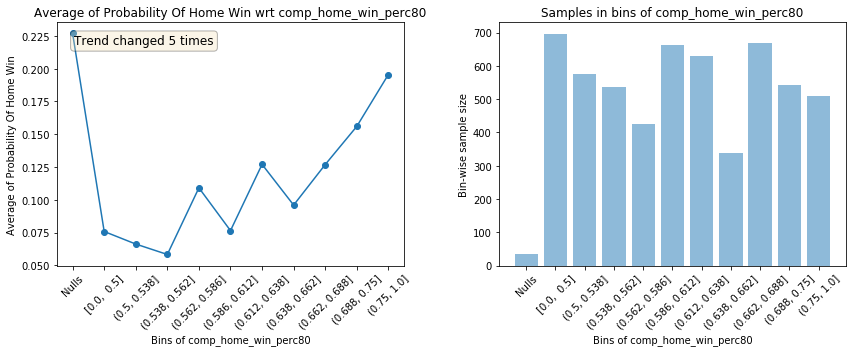

                                           Test data plots                                            


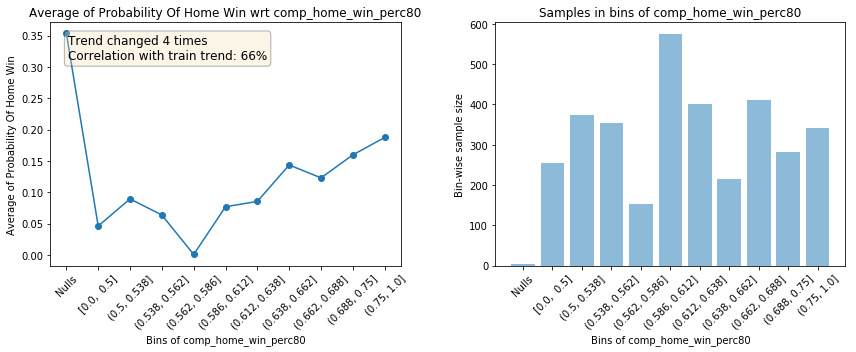

--------------------------------------------------------------------------------------------------------------


                                  Plots for hometeam_scored_ave_all5                                  
                                           Train data plots                                           


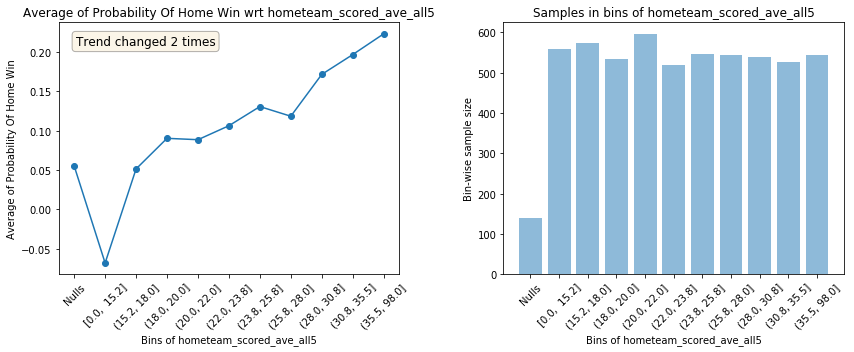

                                           Test data plots                                            


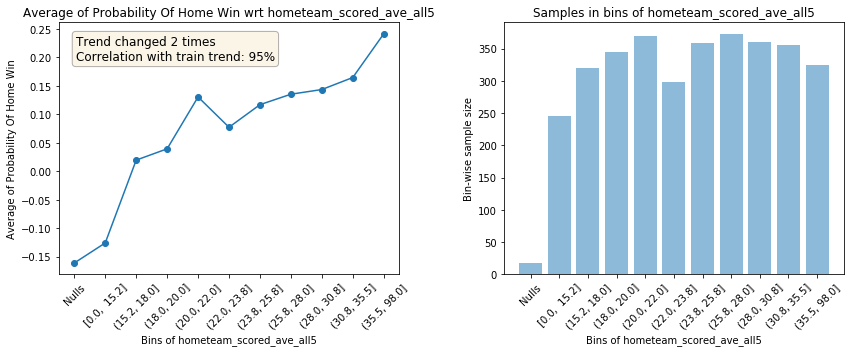

--------------------------------------------------------------------------------------------------------------


                                  Plots for hometeam_scored_std_all5                                  
                                           Train data plots                                           


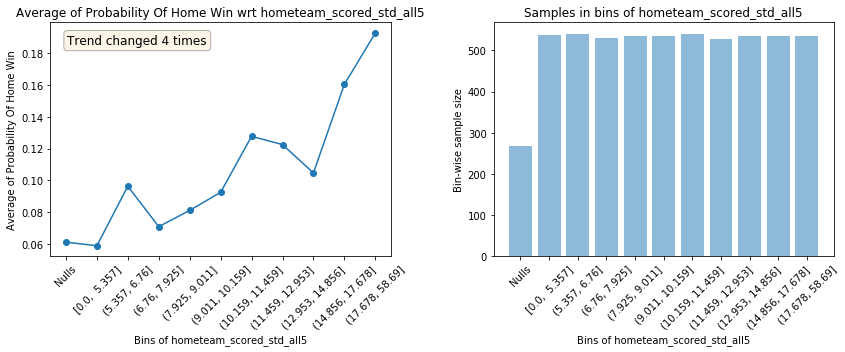

                                           Test data plots                                            


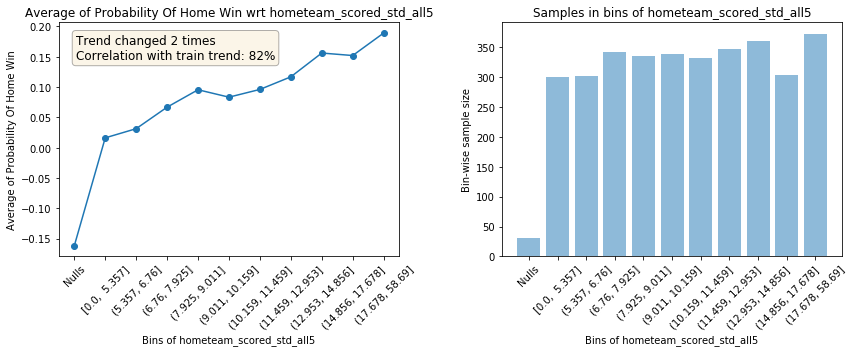

--------------------------------------------------------------------------------------------------------------


                                 Plots for hometeam_scored_ave_home5                                  
                                           Train data plots                                           


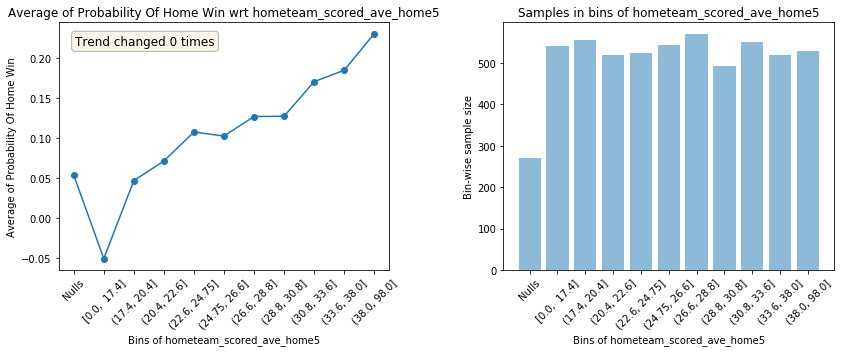

                                           Test data plots                                            


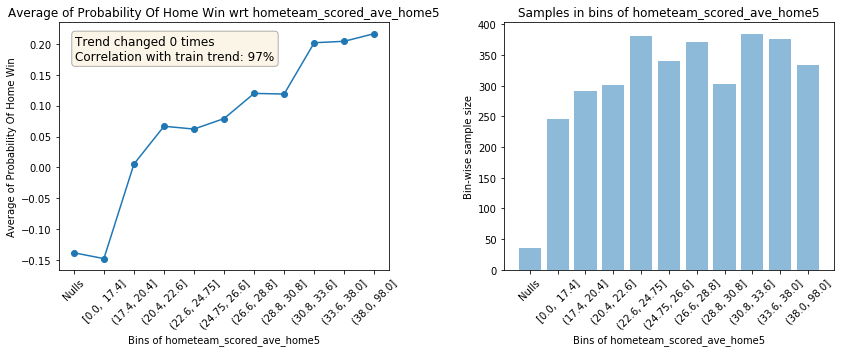

--------------------------------------------------------------------------------------------------------------


                                 Plots for hometeam_scored_std_home5                                  
                                           Train data plots                                           


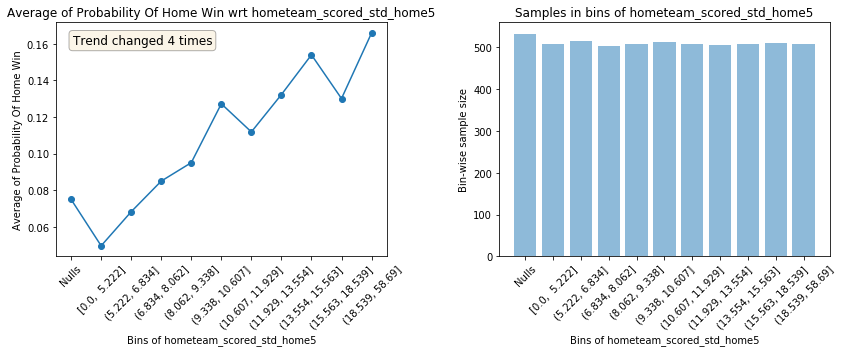

                                           Test data plots                                            


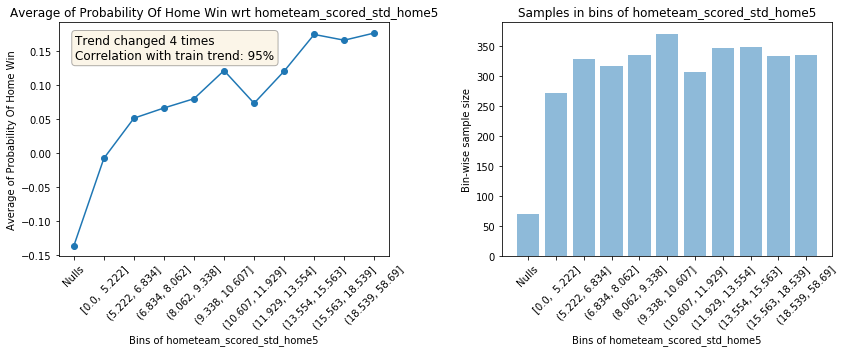

--------------------------------------------------------------------------------------------------------------


                                 Plots for hometeam_conceded_ave_all5                                 
                                           Train data plots                                           


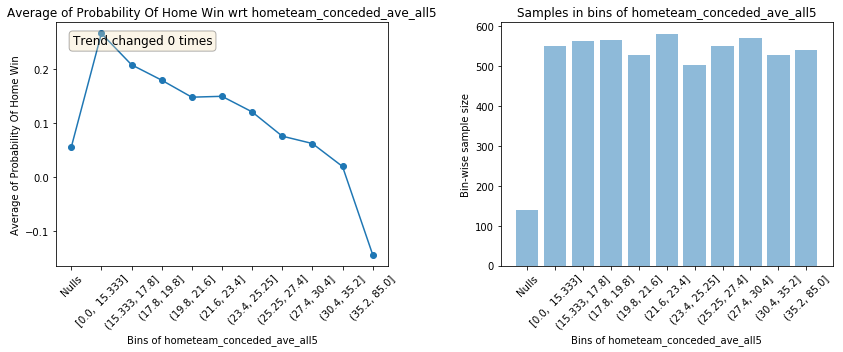

                                           Test data plots                                            


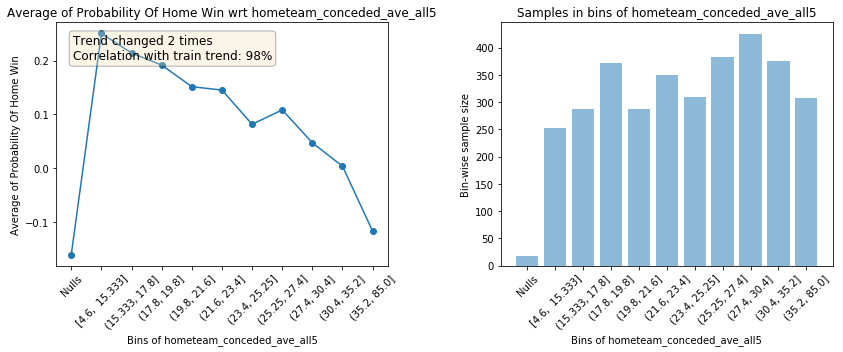

--------------------------------------------------------------------------------------------------------------


                                 Plots for hometeam_conceded_std_all5                                 
                                           Train data plots                                           


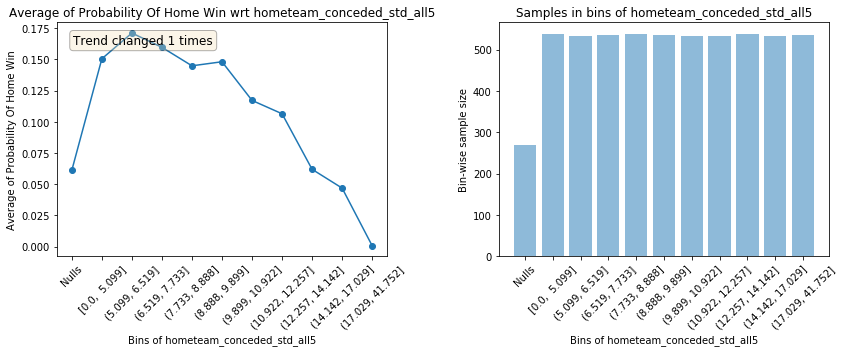

                                           Test data plots                                            


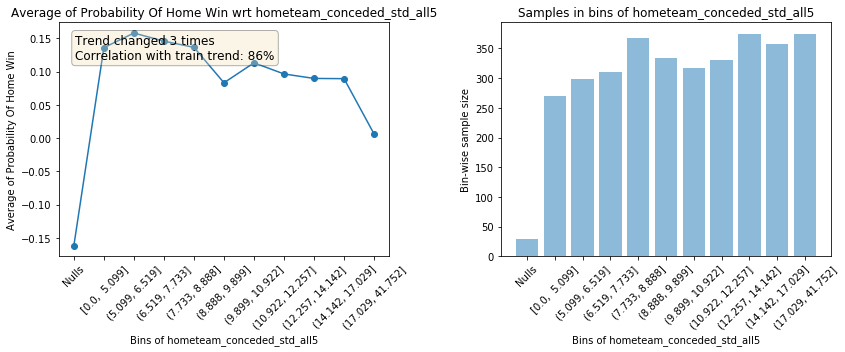

--------------------------------------------------------------------------------------------------------------


                                Plots for hometeam_conceded_ave_home5                                 
                                           Train data plots                                           


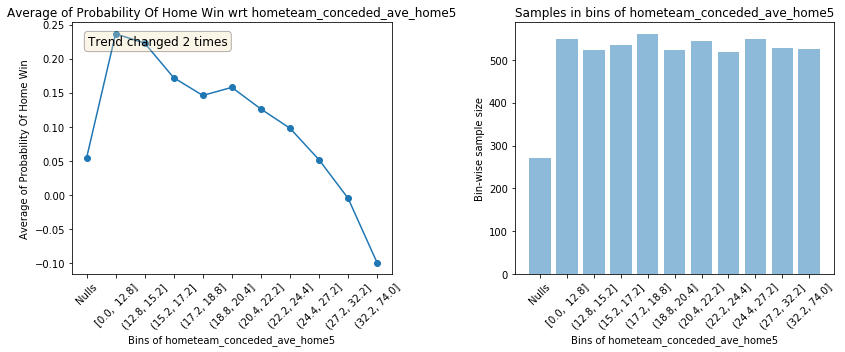

                                           Test data plots                                            


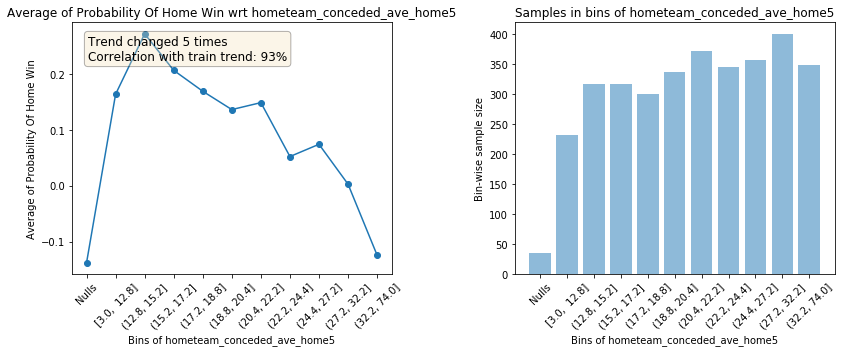

--------------------------------------------------------------------------------------------------------------




In [17]:
get_univariate_plots(data=Xtrain, target_col=prediction_column, features_list=Xtrain.columns[:10], data_test=Xtest)

In [18]:
stats = get_trend_stats(data=Xtrain, target_col=prediction_column, data_test=Xtest)

Only one bin created for home_team_form_previous_matchup_home_7. Correlation can't be calculated
Only one bin created for home_team_form_previous_matchup_home_8. Correlation can't be calculated
Only one bin created for home_team_form_previous_matchup_home_9. Correlation can't be calculated
Only one bin created for home_team_form_previous_matchup_home_10. Correlation can't be calculated
Returning stats for all numeric features


In [19]:
stats[:5]

,Feature,Trend_changes,Trend_changes_test,Trend_correlation
0,comp_home_win_perc20,5,5,0.576199
1,comp_home_win_perc40,5,4,0.609379
2,comp_home_win_perc80,5,4,0.669424
3,hometeam_scored_ave_all5,2,2,0.955770
4,hometeam_scored_std_all5,4,2,0.820589


In [107]:
def get_not_noise(stats, noise_threshold):
    not_noise = []
    not_noise = list(stats[stats['Trend_correlation']>noise_threshold]['Feature'])
    return not_noise

def update_feature_set(df, f):
    return df[f]

feature_set_1 = get_not_noise(stats, 0.9)
print("Number of selected features to build a prediction model ::", len(feature_set_1))

Number of selected features to build a prediction model :: 121


In [108]:
cols_model_in = ['id', 'Competition.ID','Home.Team...ID', 'Away.Team...ID']
cols_model = [item for item in df.columns if item in feature_set_1 + cols_model_in]

In [109]:
df.dropna(inplace = True)
Xtrain, Xtest, ytrain, ytest = df[df['Fixture...Date']<'01/09/2018'][cols_model], df[df['Fixture...Date']>='01/09/2018'][cols_model], df[df['Fixture...Date']<'01/09/2018']['Prediction'], df[df['Fixture...Date']>='01/09/2018']['Prediction']
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((1775, 125), (2033, 125), (1775,), (2033,))

# Data scaling

In [114]:
my_scaler = preprocessing.StandardScaler(copy = True, with_mean=True, with_std=True)
Xtrain_scaled = pd.DataFrame(my_scaler.fit_transform(Xtrain.values))
Xtest_scaled = pd.DataFrame(my_scaler.fit_transform(Xtest.values))
Xtrain_scaled.columns = Xtrain.columns
Xtest_scaled.columns = Xtest.columns

In [115]:
Xtrain_scaled.shape, Xtest_scaled.shape, ytrain.shape, ytest.shape

((1775, 125), (2033, 125), (1775,), (2033,))

# Cross-validation

In [116]:
def train_model(X_train, y_train, C, gamma, model):
    if model[0] == "svm":
        clf = svm.SVC(kernel = model[1], C = C, gamma = gamma,  probability = True)
    elif model[0] == "lr":
        clf = LogisticRegression(C = C, multi_class = "warn", solver = 'warn', class_weight = 'balanced', verbose = 0).fit(X_train, y_train)
    clf.fit(X_train, y_train)
    
    return clf

def test_model(clf, X_test):
    return clf.predict(X_test)

In [117]:
C_ = [0.05, 0.07, 0.09, 0.1, 1]
G_ = [0.01, 0.05, 0.1]
score = []
d = {}
mean = 0
std = 0

for c in C_:
    d.update({c: []})
    for g in G_:
        print("Training with C=", c, ', g=', g)
        clf = train_model(Xtrain_scaled, ytrain, c, g, ['svm', "rbf"])
        print('Start CV for C = ', c, ', g = ', g)
        score = cross_val_score(clf, Xtest_scaled, ytest, cv = 10)
        d[c].append([g, score])
        mean = np.round(np.mean(score), 4)
        std = np.round(np.std(score), 4)
        print('Mean: ', mean, ". Std: ", std, 'CV=', score)
        score=[]

Training with C= 0.05 , g= 0.01
Start CV for C =  0.05 , g =  0.01
Mean:  0.669 . Std:  0.0064 CV= [0.66341463 0.67647059 0.68472906 0.66502463 0.66995074 0.66502463
 0.66502463 0.66995074 0.66502463 0.66502463]
Training with C= 0.05 , g= 0.05
Start CV for C =  0.05 , g =  0.05
Mean:  0.6645 . Std:  0.001 CV= [0.66341463 0.66176471 0.66502463 0.66502463 0.66502463 0.66502463
 0.66502463 0.66502463 0.66502463 0.66502463]
Training with C= 0.05 , g= 0.1
Start CV for C =  0.05 , g =  0.1
Mean:  0.6645 . Std:  0.001 CV= [0.66341463 0.66176471 0.66502463 0.66502463 0.66502463 0.66502463
 0.66502463 0.66502463 0.66502463 0.66502463]
Training with C= 0.07 , g= 0.01
Start CV for C =  0.07 , g =  0.01
Mean:  0.7353 . Std:  0.0217 CV= [0.77073171 0.75980392 0.72413793 0.75862069 0.72906404 0.71428571
 0.71428571 0.71921182 0.70935961 0.75369458]
Training with C= 0.07 , g= 0.05
Start CV for C =  0.07 , g =  0.05
Mean:  0.6645 . Std:  0.001 CV= [0.66341463 0.66176471 0.66502463 0.66502463 0.6650246

I believe for this task the best kernel is RBF. But for an experiment run SVN with other kernels.

In [118]:
kernel = ['rbf', 'sigmoid', 'poly', 'linear']
acc3 = {}
for i in kernel:
    clf = train_model(Xtrain_scaled, ytrain, 0.1, 0.01, ['svm', i])
    clf_predictions = test_model(clf, Xtest_scaled)
    acc3[i] = metrics.accuracy_score(ytest, clf_predictions) * 100
    print("Kernel:", i.upper(), "Accuracy:", acc3[i])

Kernel: RBF Accuracy: 84.50565666502705
Kernel: SIGMOID Accuracy: 86.47319232661091
Kernel: POLY Accuracy: 75.79931136251845
Kernel: LINEAR Accuracy: 100.0


In [119]:
df_temp3 = pd.DataFrame.from_dict(acc3, orient = 'index', columns = ['Accuracy'])
df_temp3

,Accuracy
rbf,84.505657
sigmoid,86.473192
poly,75.799311
linear,100.000000


Therefore, kernels RBF and SIGMOID show the best behavior. Linear - overfitting, poly - poor result.

# Train model with the best hyper-parameters for two kernels

In [120]:
clf = train_model(Xtrain_scaled, ytrain, 0.1, 0.01, ['svm', "rbf"])
clf_predictions = test_model(clf, Xtest_scaled)
print("Accuracy: {}%".format(metrics.accuracy_score(ytest, clf_predictions) * 100))
print(classification_report(ytest, clf_predictions))

Accuracy: 84.50565666502705%
              precision    recall  f1-score   support

           0       0.89      0.61      0.73       682
           1       0.83      0.96      0.89      1351

   micro avg       0.85      0.85      0.85      2033
   macro avg       0.86      0.79      0.81      2033
weighted avg       0.85      0.85      0.84      2033



In [121]:
clf = train_model(Xtrain_scaled, ytrain, 0.1, 0.01, ['svm', "sigmoid"])
clf_predictions = test_model(clf, Xtest_scaled)
print("Accuracy: {}%".format(metrics.accuracy_score(ytest, clf_predictions) * 100 ))
print(classification_report(ytest, clf_predictions))

Accuracy: 86.47319232661091%
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       682
           1       0.89      0.91      0.90      1351

   micro avg       0.86      0.86      0.86      2033
   macro avg       0.85      0.84      0.85      2033
weighted avg       0.86      0.86      0.86      2033



In [122]:
clf.predict_proba(Xtest_scaled)

array([[0.0980672 , 0.9019328 ],
       [0.02819078, 0.97180922],
       [0.00624958, 0.99375042],
       ...,
       [0.99208629, 0.00791371],
       [0.00588791, 0.99411209],
       [0.55009997, 0.44990003]])

In [123]:
clf_predictions

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

# Learning curve

Automatically created module for IPython interactive environment


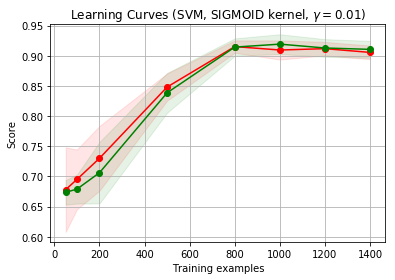

In [124]:
print(__doc__)

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.utils import shuffle

train_sizes = [50, 100, 200, 500, 800, 1000, 1200, 1400]

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=train_sizes):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    return plt

title = r"Learning Curves (SVM, SIGMOID kernel, $\gamma=0.01$)"

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=42)

estimator = clf

plot_learning_curve(estimator, title, Xtest_scaled, ytest, cv=cv, n_jobs=4)
plt.show()

# Creating output file

In [125]:
#Fixture Date, Fixture ID, Competition ID, Home Team ID, Away Team ID, Probability Of Home Win
cols_output = ['Fixture...Date', 'id', 'Competition.ID', 'Home.Team...ID', 'Away.Team...ID']
probs = clf.predict_proba(Xtest_scaled)[:, 1]
probs

array([0.9019328 , 0.97180922, 0.99375042, ..., 0.00791371, 0.99411209,
       0.44990003])

In [126]:
df_temp = df[df['Fixture...Date']>='01/09/2018'][cols_output].dropna()
df_temp.insert(5, "Probability Of Home Win", probs, True) 

In [128]:
df_temp.columns = ['Fixture Date', 'Fixture ID', 'Competition ID', 'Home Team ID', 'Away Team ID', 'Probability Of Home Win']

In [129]:
df_temp.to_csv('test_output.csv')